In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
tennis_data<-read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn")

glimpse(tennis_data)

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 6,866
Columns: 50
$ ...1               <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ tourney_id         <chr> "2019-M020", "2019-M020", "2019-M020", "2019-M020",…
$ tourney_name       <chr> "Brisbane", "Brisbane", "Brisbane", "Brisbane", "Br…
$ surface            <chr> "Hard", "Hard", "Hard", "Hard", "Hard", "Hard", "Ha…
$ draw_size          <dbl> 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,…
$ tourney_level      <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "…
$ tourney_date       <dbl> 20181231, 20181231, 20181231, 20181231, 20181231, 2…
$ match_num          <dbl> 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 2…
$ winner_id          <dbl> 105453, 106421, 105453, 104542, 106421, 104871, 105…
$ winner_seed        <chr> "2", "4", "2", NA, "4", NA, "2", NA, "7", "4", "5",…
$ winner_entry       <chr> NA, NA, NA, "PR", NA, NA, NA, "PR", NA, NA, NA, NA,…
$ winner_name        <chr> "Kei Nishikori", "Daniil Medvedev", "Kei Nishikori"…
$ winner_hand   

In [12]:
filtered_data<- tennis_data|>
                select(tourney_id,w_ace,surface,l_ace,w_1stWon,w_1stIn,l_1stWon)|>
                filter(surface!="None")|>
                mutate(surface=as_factor(surface))|>
                mutate(total_aces=w_ace+l_ace)|>
                mutate(total_first_won=w_1stWon+l_1stWon)
filtered_data

tourney_id,w_ace,surface,l_ace,w_1stWon,w_1stIn,l_1stWon,total_aces,total_first_won
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-M020,3,Hard,8,31,44,34,11,65
2019-M020,10,Hard,17,28,33,36,27,64
2019-M020,2,Hard,10,26,33,15,12,41
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2017-M-DC-2017-WG-M-BEL-FRA-01,12,Hard,1,31,33,30,13,61
2017-M-DC-2017-WG-M-BEL-FRA-01,1,Hard,10,47,71,44,11,91
2017-M-DC-2017-WG-M-BEL-FRA-01,7,Hard,1,34,38,29,8,63


Warning message:
“Removed 85 rows containing missing values (geom_point).”


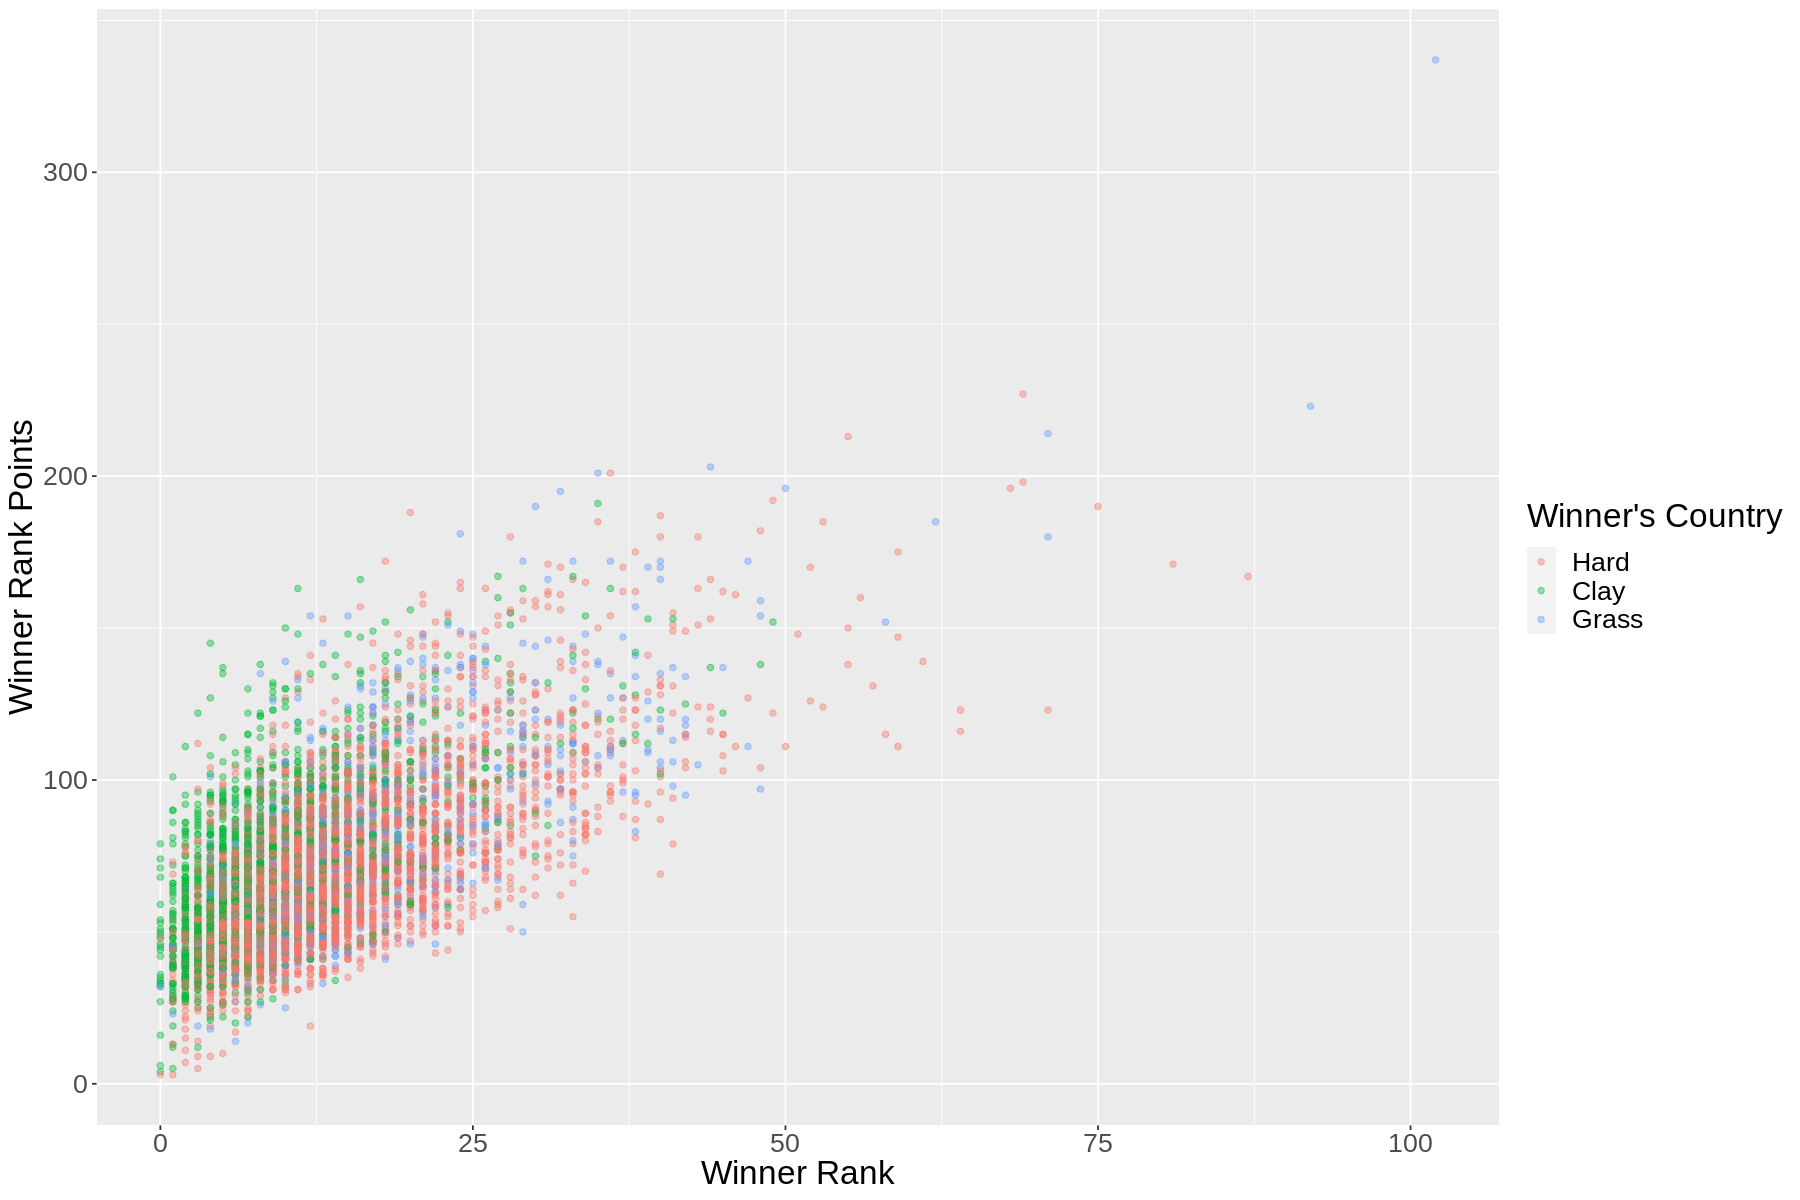

In [19]:
options(repr.plot.height=10, repr.plot.width=15)

filtered_data_plot<-filtered_data|>
                    ggplot(aes(x=total_aces,y=total_first_won,color=surface))+
                    geom_point(alpha=0.4)+
                    labs(x="Total aces in a game",y="Total points won on first serve",color="Playing SUr")+
                    theme(text=element_text(size=20))

filtered_data_plot